In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lds import LDS

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

A 2D surface parallel to earth. Noisy observations are positions $x_{x}$, $x_{y}$. Hidden variables are true position values and velocities $v_{x}$, $v_{y}$. We assume constant velocity for this example.

$x_{x}(t+1) = x_{x}(t) + v_{x}(t) + \eta_{x_{x}}(t)$

$v_{x}(t+1)$ = $v_{x}(t) + \eta_{v_x}(t)$

$x_{y}(t+1) = x_{y}(t) + v_{y}(t) + \eta_{x_{y}}(t)$

$v_{y}(t+1)$ = $v_{y}(t) + \eta_{v_y}(t)$

In [2]:
A = np.array([[1,1,0,0],[0,1,0,0],[0,0,1,1],[0,0,0,1]])
B = np.array([[1,0,0,0],[0,0,1,0]])
pi_m = np.array([0,0.8,0,-0.3])
S = 4
O = 2
pi_s = np.eye(S)
E_h = np.eye(S)*0.2
E_o = np.eye(O)*0.2

In [3]:
lds = LDS(A,B,pi_m,pi_s,S,O,E_h,E_o)

In [4]:
states,observations = lds.generate_data(10)

In [5]:
print states

[array([ 0.91132717,  2.08088346, -0.99434818, -0.33925928]), array([ 2.88663532,  2.5390832 , -1.55182634, -0.95246091]), array([ 4.79207064,  2.64367124, -2.14184816, -1.06314904]), array([ 8.08276798,  2.28393611, -3.57553681, -1.35607358]), array([10.34592558,  2.07145666, -5.18391131, -1.56581696]), array([12.04968651,  2.38100384, -6.98294947, -0.47658634]), array([13.66233982,  2.59182885, -6.92912396, -0.8896848 ]), array([17.07196196,  3.37486295, -8.77440692, -1.22037996]), array([20.31722994,  3.21365552, -9.6181752 , -0.52700339]), array([23.94328454,  4.03654277, -9.76143256, -0.29708092])]


In [6]:
print observations

[array([ 0.75582553, -1.39884575]), array([ 3.1477673 , -1.51446264]), array([ 5.05974371, -2.93771196]), array([ 8.55093338, -4.21600368]), array([10.42994741, -5.05198796]), array([12.37585505, -6.39781987]), array([13.56891012, -6.78412221]), array([17.44754232, -9.36365966]), array([20.72445904, -9.96275146]), array([ 23.86461421, -10.41199363])]


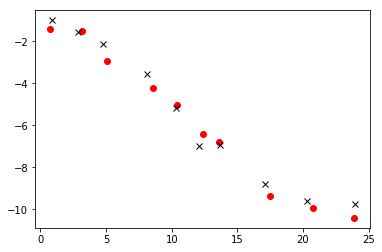

In [7]:
for obs, state in zip(observations, states):
    plt.plot(obs[0],obs[1],'ro')
    plt.plot(state[0],state[2],'kx')
plt.show()

In [8]:
f,F = lds.filtering(observations)

In [9]:
print f

[array([[ 0.37791276],
       [ 0.        ],
       [-0.69942287],
       [ 0.        ]]), array([[ 2.35638029],
       [ 0.79138701],
       [-1.28159413],
       [-0.2328685 ]]), array([[ 4.67734843],
       [ 1.55617757],
       [-2.65306209],
       [-0.80216823]]), array([[ 8.13067816],
       [ 2.52876824],
       [-4.0780396 ],
       [-1.12145653]]), array([[10.47092179],
       [ 2.43195831],
       [-5.07832383],
       [-1.05923292]]), array([[12.46977429],
       [ 2.20954088],
       [-6.35143932],
       [-1.16907031]]), array([[13.76674597],
       [ 1.74087931],
       [-6.91532103],
       [-0.85826797]]), array([[17.10193302],
       [ 2.559675  ],
       [-9.08037785],
       [-1.52940131]]), array([[ 20.53510757],
       [  3.00828482],
       [-10.07802223],
       [ -1.25630285]]), array([[ 23.80738735],
       [  3.14386687],
       [-10.5763104 ],
       [ -0.86700305]])]


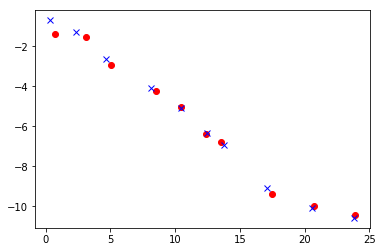

In [10]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(f[i][0],f[i][2],'bx')
plt.show()

In [11]:
h,H = lds.smoothing(observations)

In [12]:
print h

[array([[ 0.72504545],
       [ 1.37320137],
       [-0.79746554],
       [-0.58466526]]), array([[ 2.79251218],
       [ 2.05213737],
       [-1.57821613],
       [-0.9732452 ]]), array([[ 5.18365978],
       [ 2.39206313],
       [-2.81130014],
       [-1.10198632]]), array([[ 8.03864923],
       [ 2.26906258],
       [-4.04671345],
       [-1.09730044]]), array([[10.25835396],
       [ 2.19541988],
       [-5.10815067],
       [-1.1284778 ]]), array([[12.23282254],
       [ 2.34272847],
       [-6.25692795],
       [-1.13935568]]), array([[14.2115672 ],
       [ 2.85402087],
       [-7.27569118],
       [-1.27082601]]), array([[17.34426133],
       [ 3.08664001],
       [-8.91749372],
       [-1.03131982]]), array([[20.60629362],
       [ 3.14386687],
       [-9.87362412],
       [-0.86700305]]), array([[ 23.80738735],
       [  3.14386687],
       [-10.5763104 ],
       [ -0.86700305]])]


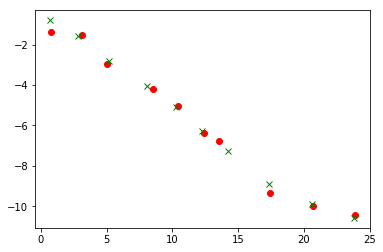

In [13]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h[i][0],h[i][2],'gx')
plt.show()

In [46]:
A, B, pi_m, pi_s, E_h, E_o, h_list, H_list = lds.EM(observations,num_iterations=3)

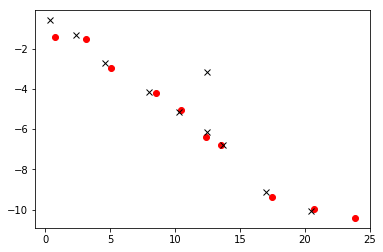

In [47]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h_list[i][0],h_list[i][2],'kx')
plt.show()

In [48]:
A

array([[-1.37480736,  1.37484798, -3.1015074 ,  3.95369021],
       [-0.02104228,  1.52146975,  0.51968096,  0.67394769],
       [ 1.20072019, -0.50066473,  2.3621857 , -2.75690776],
       [-0.01634304,  0.86475338,  0.69550073,  1.19752813]])